# NBA - 1950-2017 - EXPLORE HEIGHT OVER TIME

## DATA CLEANSING

## Import packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Read CSV files

In [2]:
players = pd.read_csv('Players.csv')
seasons = pd.read_csv('Seasons_Stats.csv')
#seasons = seasons.drop(seasons.index[len(seasons) - 1])


### First look at the tables

In [3]:
# SEASONS TABLE
pd.set_option('display.max_columns', 60)
print(seasons.shape)
#print('seasons table has '+ str(len(seasons))+ ' rows.')
seasons.head(2)

(24691, 53)


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0


In [4]:
# PLAYERS TABLE
print(players.shape)
#print('players table has '+ str(len(players))+ ' rows.')
players.head(2)

(3922, 8)


,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana


Remove "Unnamed: 0" column

In [5]:
seasons.drop('Unnamed: 0',axis=1,inplace=True)
players.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
players.head(2)

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana


### Remove nulls - players table

In [7]:
players.isnull().sum()
#players.info()

Player           1
height           1
weight           1
collage        349
born             1
birth_city     470
birth_state    483
dtype: int64

In [8]:
players = players.dropna(subset=['Player']).reset_index(drop=True)
print(players.shape)
players.isnull().sum()

(3921, 7)


Player           0
height           0
weight           0
collage        348
born             0
birth_city     469
birth_state    482
dtype: int64

### Remove nulls - seasons table

In [9]:
seasons.isnull().sum()

Year         67
Player       67
Pos          67
Age          75
Tm           67
G            67
GS         6458
MP          553
PER         590
TS%         153
3PAr       5852
FTr         166
ORB%       3899
DRB%       3899
TRB%       3120
AST%       2136
STL%       3899
BLK%       3899
TOV%       5109
USG%       5051
blanl     24691
OWS         106
DWS         106
WS          106
WS/48       590
blank2    24691
OBPM       3894
DBPM       3894
BPM        3894
VORP       3894
FG           67
FGA          67
FG%         166
3P         5764
3PA        5764
3P%        9275
2P           67
2PA          67
2P%         195
eFG%        166
FT           67
FTA          67
FT%         925
ORB        3894
DRB        3894
TRB         379
AST          67
STL        3894
BLK        3894
TOV        5046
PF           67
PTS          67
dtype: int64

In [10]:
seasons = seasons.dropna(subset=['Player']).reset_index(drop=True)
print(seasons.shape)
seasons.isnull().sum()

(24624, 52)


Year          0
Player        0
Pos           0
Age           8
Tm            0
G             0
GS         6391
MP          486
PER         523
TS%          86
3PAr       5785
FTr          99
ORB%       3832
DRB%       3832
TRB%       3053
AST%       2069
STL%       3832
BLK%       3832
TOV%       5042
USG%       4984
blanl     24624
OWS          39
DWS          39
WS           39
WS/48       523
blank2    24624
OBPM       3827
DBPM       3827
BPM        3827
VORP       3827
FG            0
FGA           0
FG%          99
3P         5697
3PA        5697
3P%        9208
2P            0
2PA           0
2P%         128
eFG%         99
FT            0
FTA           0
FT%         858
ORB        3827
DRB        3827
TRB         312
AST           0
STL        3827
BLK        3827
TOV        4979
PF            0
PTS           0
dtype: int64

## DATA PREPERATION

In [11]:
# Create New tables with "Player" as Index
seasons_NI = seasons.set_index('Player',inplace=False) #setting the player name as the seasons index
players_NI = players.set_index('Player',inplace=False) #setting the player name as the players index

In [12]:
print(players_NI.iloc[:,0:2].drop_duplicates().head())
print(seasons_NI.head())
#players[players.Player == 'Allen Iverson*'].head()
       
seasons_NI.head()

                 height  weight
Player                         
Curly Armstrong   180.0    77.0
Cliff Barker      188.0    83.0
Leo Barnhorst     193.0    86.0
Ed Bartels        196.0    88.0
Ralph Beard       178.0    79.0
                   Year  Pos   Age   Tm     G  GS  MP  PER    TS%  3PAr  \
Player                                                                    
Curly Armstrong  1950.0  G-F  31.0  FTW  63.0 NaN NaN  NaN  0.368   NaN   
Cliff Barker     1950.0   SG  29.0  INO  49.0 NaN NaN  NaN  0.435   NaN   
Leo Barnhorst    1950.0   SF  25.0  CHS  67.0 NaN NaN  NaN  0.394   NaN   
Ed Bartels       1950.0    F  24.0  TOT  15.0 NaN NaN  NaN  0.312   NaN   
Ed Bartels       1950.0    F  24.0  DNN  13.0 NaN NaN  NaN  0.308   NaN   

                   FTr  ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  blanl  \
Player                                                                          
Curly Armstrong  0.467   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
Cliff B

,Year,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Curly Armstrong,1950.0,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
Cliff Barker,1950.0,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
Leo Barnhorst,1950.0,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
Ed Bartels,1950.0,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
Ed Bartels,1950.0,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [13]:
print(players.shape)
#print(players_NI.iloc[:,0:2])

(3921, 7)


## Filter Significant players

In [14]:
#Show data from 1951 and 1952
print(' DATA FROM 1951: \n')
print(seasons_NI[seasons_NI['Year']==1951].loc[:,['G', 'MP']].head()) 
print('\n DATA FROM 1952: \n')
print(seasons_NI[seasons_NI['Year']==1952].loc[:,['G', 'MP']].head()) 

# G= Games, MP = Minutes Played
seasons_NI = seasons_NI[(((seasons_NI['MP']/seasons_NI['G'])>25) | ((seasons_NI['Year']<1952) & (seasons_NI['G']>30)))]

 DATA FROM 1951: 

                    G  MP
Player                   
Paul Arizin*     65.0 NaN
Curly Armstrong  38.0 NaN
Cliff Barker     56.0 NaN
Leo Barnhorst    68.0 NaN
Ed Bartels       17.0 NaN

 DATA FROM 1952: 

                   G      MP
Player                      
Paul Arizin*    66.0  2939.0
Cliff Barker    44.0   494.0
Don Barksdale*  62.0  2014.0
Leo Barnhorst   66.0  2344.0
Elmer Behnke     4.0    55.0


# Join players and seasons tables into "seasons_new" - relevant fields only

In [15]:
print(players_NI.iloc[:,0:2].head())
print(seasons_NI.iloc[:,0:2].head())

                 height  weight
Player                         
Curly Armstrong   180.0    77.0
Cliff Barker      188.0    83.0
Leo Barnhorst     193.0    86.0
Ed Bartels        196.0    88.0
Ralph Beard       178.0    79.0
                   Year  Pos
Player                      
Curly Armstrong  1950.0  G-F
Cliff Barker     1950.0   SG
Leo Barnhorst    1950.0   SF
Ralph Beard      1950.0    G
Charlie Black    1950.0  F-C


In [16]:
players_for_join = players_NI.iloc[:,0:2]
seasons_for_join = seasons_NI.iloc[:,0:2]

seasons_new = seasons_for_join.join(players_for_join,on='Player')

In [17]:
print(seasons_new.head())
print(len(seasons_new))
print(len(seasons_new.drop_duplicates()))
seasons_new.info()

                   Year  Pos  height  weight
Player                                      
Curly Armstrong  1950.0  G-F   180.0    77.0
Cliff Barker     1950.0   SG   188.0    83.0
Leo Barnhorst    1950.0   SF   193.0    86.0
Ralph Beard      1950.0    G   178.0    79.0
Charlie Black    1950.0  F-C   196.0    90.0
8718
6720
<class 'pandas.core.frame.DataFrame'>
Index: 8718 entries, Curly Armstrong to Cody Zeller
Data columns (total 4 columns):
Year      8718 non-null float64
Pos       8718 non-null object
height    8718 non-null float64
weight    8718 non-null float64
dtypes: float64(3), object(1)
memory usage: 340.5+ KB


## GROUPING 'POS' INTO 3 POSITIONS

In [18]:
print (seasons_new.Pos.unique())
unique_count = seasons_new.Pos.nunique()
print(f' There are {unique_count} unique positions out of {len(seasons_new)} records.')

['G-F' 'SG' 'SF' 'G' 'F-C' 'PG' 'F-G' 'C' 'PF' 'F' 'C-F' 'PF-C' 'SF-SG'
 'C-PF' 'SG-PG' 'SF-PF' 'PG-SG' 'SG-SF' 'PG-SF' 'SG-PF' 'PF-SF']
 There are 21 unique positions out of 8718 records.


In [19]:
seasons_new.reset_index(inplace=True)
seasons_new.groupby('Pos')[['Player']].count()

,Player
Pos,
C,1451
C-F,18
C-PF,5
F,23
F-C,39
F-G,30
G,51
G-F,41
PF,1679


In [20]:
def changePosition(x):
    #if ("SG" in x) or ("PG" in x):
    if ("G" in x):
        return "Guard"
    #elif ("SF" in x) or ("PF" in x):
    elif ("C" in x):
        return "Center"
    else:
        return "Forward"

In [21]:
seasons_new['Pos'].head()
seasons_new['Position'] = seasons_new['Pos'].apply(changePosition)
print(seasons_new[seasons_new.Player == 'Allen Iverson*'].head(30))
#seasons.reset_index(inplace=True)
#print(seasons[seasons.Player == 'Allen Iverson*'].head(20))




              Player    Year    Pos  height  weight Position
4914  Allen Iverson*  1997.0     PG   183.0    74.0    Guard
5101  Allen Iverson*  1998.0     PG   183.0    74.0    Guard
5292  Allen Iverson*  1999.0     SG   183.0    74.0    Guard
5453  Allen Iverson*  2000.0     SG   183.0    74.0    Guard
5610  Allen Iverson*  2001.0     SG   183.0    74.0    Guard
5784  Allen Iverson*  2002.0     SG   183.0    74.0    Guard
5953  Allen Iverson*  2003.0     SG   183.0    74.0    Guard
6129  Allen Iverson*  2004.0     SG   183.0    74.0    Guard
6324  Allen Iverson*  2005.0     PG   183.0    74.0    Guard
6523  Allen Iverson*  2006.0     PG   183.0    74.0    Guard
6714  Allen Iverson*  2007.0  SG-PG   183.0    74.0    Guard
6715  Allen Iverson*  2007.0     PG   183.0    74.0    Guard
6716  Allen Iverson*  2007.0     SG   183.0    74.0    Guard
6900  Allen Iverson*  2008.0     SG   183.0    74.0    Guard
7091  Allen Iverson*  2009.0  PG-SG   183.0    74.0    Guard
7092  Allen Iverson*  20

In [22]:
seasons_new.drop(['Pos'], axis=1, inplace = True)
seasons_new["is_duplicate"]= seasons_new.duplicated()
#print(seasons_new[seasons_new.Player == 'Isaiah Thomas'].tail(30))
print(seasons_new[seasons_new.Player == 'Allen Iverson*'].head(30))

              Player    Year  height  weight Position  is_duplicate
4914  Allen Iverson*  1997.0   183.0    74.0    Guard         False
5101  Allen Iverson*  1998.0   183.0    74.0    Guard         False
5292  Allen Iverson*  1999.0   183.0    74.0    Guard         False
5453  Allen Iverson*  2000.0   183.0    74.0    Guard         False
5610  Allen Iverson*  2001.0   183.0    74.0    Guard         False
5784  Allen Iverson*  2002.0   183.0    74.0    Guard         False
5953  Allen Iverson*  2003.0   183.0    74.0    Guard         False
6129  Allen Iverson*  2004.0   183.0    74.0    Guard         False
6324  Allen Iverson*  2005.0   183.0    74.0    Guard         False
6523  Allen Iverson*  2006.0   183.0    74.0    Guard         False
6714  Allen Iverson*  2007.0   183.0    74.0    Guard         False
6715  Allen Iverson*  2007.0   183.0    74.0    Guard          True
6716  Allen Iverson*  2007.0   183.0    74.0    Guard          True
6900  Allen Iverson*  2008.0   183.0    74.0    

In [23]:
seasons_new.drop(['is_duplicate'], axis=1, inplace = True)


In [24]:
seasons_new = seasons_new.drop_duplicates()
print(seasons_new[seasons_new.Player == 'Allen Iverson*'].head(20))
len(seasons_new)

              Player    Year  height  weight Position
4914  Allen Iverson*  1997.0   183.0    74.0    Guard
5101  Allen Iverson*  1998.0   183.0    74.0    Guard
5292  Allen Iverson*  1999.0   183.0    74.0    Guard
5453  Allen Iverson*  2000.0   183.0    74.0    Guard
5610  Allen Iverson*  2001.0   183.0    74.0    Guard
5784  Allen Iverson*  2002.0   183.0    74.0    Guard
5953  Allen Iverson*  2003.0   183.0    74.0    Guard
6129  Allen Iverson*  2004.0   183.0    74.0    Guard
6324  Allen Iverson*  2005.0   183.0    74.0    Guard
6523  Allen Iverson*  2006.0   183.0    74.0    Guard
6714  Allen Iverson*  2007.0   183.0    74.0    Guard
6900  Allen Iverson*  2008.0   183.0    74.0    Guard
7091  Allen Iverson*  2009.0   183.0    74.0    Guard
7301  Allen Iverson*  2010.0   183.0    74.0    Guard


7966

# GRAPHS

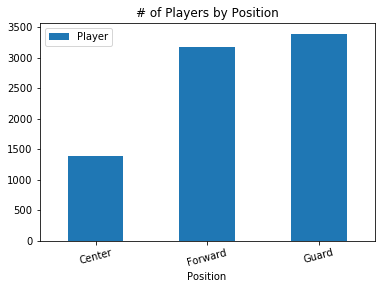

In [73]:
seasons_new.groupby('Position')[['Player']].count().plot(kind='bar',rot=15, title = '# of Players by Position')

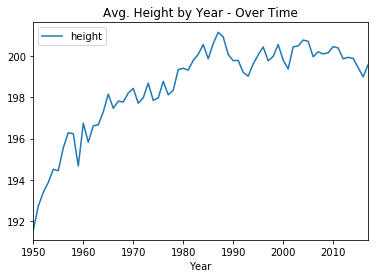

In [72]:
#print(seasons_new.groupby(['Year','Position'])[['height']].mean())
seasons_new.groupby(['Year'])[['height']].mean().plot(title = 'Avg. Height by Year - Over Time')

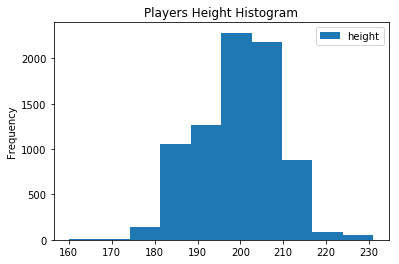

In [71]:
#seasons_new.groupby(['Year'])[['height']].mean().plot(kind='box')
seasons_new[['height']].plot(kind='hist', title = 'Players Height Histogram')
#df_dessert.groupby('num.of.guests')[['dessert', 'not.dessert']].sum().plot(kind='bar')

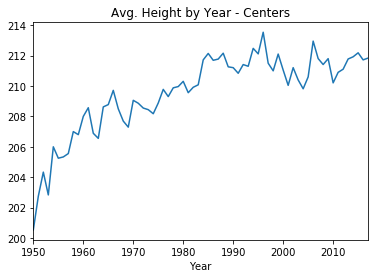

In [66]:
seasons_new[(seasons_new['Position']=='Center')].groupby('Year').height.mean().plot(title = 'Avg. Height by Year - Centers')

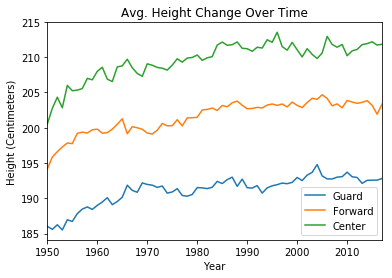

In [65]:
#[seasons_new['Position']

fig = plt.figure()
ax = fig.gca()
for n in seasons_new.Position.unique():
    seasons_new[(seasons_new['Position']==n)].groupby('Year').height.mean().plot()

ax.set_title('Avg. Height Change Over Time')
ax.set_ylabel('Height (Centimeters)')
plt.legend(seasons_new.Position.unique(), loc='best')
plt.show()

## ANALYSIS BY DECADE

In [30]:
def Decade(z):
    if z < 1960:
         return "(1) 50's"
    elif z < 1970:
         return "(2) 60's"
    elif z < 1980:
         return "(3) 70's"
    elif z < 1990:
         return "(4) 80's"
    elif z < 2000:
         return "(5) 90's"
    elif z < 2010:
         return "(6) 2000's"
    else:
         return "(7) 2010's"

In [31]:
#seasons_new['Year'].apply(Decade)
seasons_new['Decade'] = seasons_new['Year'].apply(Decade)
seasons_new.tail()

,Player,Year,height,weight,Position,Decade
8713,Marvin Williams,2017.0,185.0,89.0,Forward,(7) 2010's
8714,Justise Winslow,2017.0,201.0,102.0,Forward,(7) 2010's
8715,Nick Young,2017.0,201.0,95.0,Guard,(7) 2010's
8716,Thaddeus Young,2017.0,203.0,100.0,Forward,(7) 2010's
8717,Cody Zeller,2017.0,213.0,108.0,Forward,(7) 2010's


In [32]:
df_pivot=pd.pivot_table(seasons_new,
               index='Decade',
               columns='Position', 
               values='height', 
               aggfunc='mean',
               fill_value=0)
df_pivot.head()

Position,Center,Forward,Guard
Decade,,,
(1) 50's,203.161972,197.122066,186.619672
(2) 60's,207.938776,199.920398,190.482301
(3) 70's,209.171717,200.394402,191.066339
(4) 80's,211.033613,202.852941,192.051125
(5) 90's,211.738095,203.094082,191.735433


(185, 220)

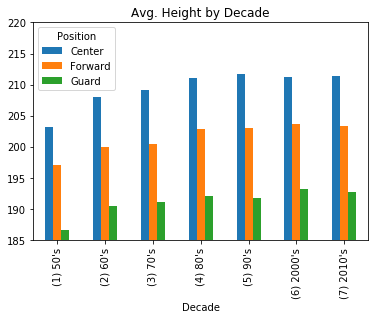

In [64]:
## 2010's - Guard's game
df_pivot.plot(kind='bar', title='Avg. Height by Decade'); plt.ylim((185,220))

In [34]:
seasons_new[(seasons_new['Position']=='Guard') ].groupby('Decade').Player.count()
#seasons_new[(seasons_new['Position']=='Guard') & (seasons_new['Decade']=="90's")].head(100)
#seasons_new[(seasons_new['Position']==n) & (seasons_new['Year']>1966)].groupby('Year').height.mean()

Decade
(1) 50's      305
(2) 60's      226
(3) 70's      407
(4) 80's      489
(5) 90's      635
(6) 2000's    714
(7) 2010's    624
Name: Player, dtype: int64

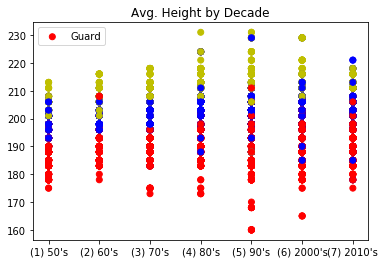

In [60]:
color_map = {'Guard': 'r', 'Forward': 'b', 'Center': 'y'}
ax = plt.subplot(title='Avg. Height by Decade')

x, y = seasons_new.Decade, seasons_new.height
colors = seasons_new.Position.map(color_map)
ax.scatter(x, y, color=colors)
plt.legend(color_map)

## ANECDOTES

In [36]:
print(' Shortest players in history: \n')
print(seasons_new[((seasons_new['height'])<170)].loc[:,['Player', 'height','Decade']].drop_duplicates())
print('\n Tallest players in history: \n')
print(seasons_new[((seasons_new['height'])>225)].loc[:,['Player', 'height','Decade']].drop_duplicates().sort_values('height',ascending=False))

 Shortest players in history: 

             Player  height      Decade
3716  Muggsy Bogues   160.0    (5) 90's
3855      Spud Webb   168.0    (5) 90's
6261   Earl Boykins   165.0  (6) 2000's

 Tallest players in history: 

                Player  height      Decade
3185        Manute Bol   231.0    (4) 80's
4768  Gheorghe Muresan   231.0    (5) 90's
4340     Shawn Bradley   229.0    (5) 90's
4501        P.J. Brown   229.0    (5) 90's
5410        P.J. Brown   229.0  (6) 2000's
5990         Yao Ming*   229.0  (6) 2000's


In [38]:
print(' Players averaged more than 48 minutes a game: \n')
print(seasons_NI[((seasons_NI['MP']/seasons_NI['G'])>48)].loc[:,['G', 'MP','Year']])
print('\n Players averaged more than 47 minutes a game: \n')
print(seasons_NI[((seasons_NI['MP']/seasons_NI['G'])>47)].loc[:,['G', 'MP','Year']])

 Players averaged more than 48 minutes a game: 

                      G      MP    Year
Player                                 
Wilt Chamberlain*  80.0  3882.0  1962.0

 Players averaged more than 47 minutes a game: 

                      G      MP    Year
Player                                 
Wilt Chamberlain*  79.0  3773.0  1961.0
Wilt Chamberlain*  80.0  3882.0  1962.0
Wilt Chamberlain*  80.0  3806.0  1963.0
Wilt Chamberlain*  79.0  3737.0  1966.0
